<a href="https://colab.research.google.com/github/PacoDLC/trading-algoritmico-a-z-con-python/blob/main/ES_TA_Cap%C3%ADtulo_04_Crea_tu_primera_estrategia_de_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px">
<img alt="Colaboratory logo" height="45px" src="https://static-881c.kxcdn.com/wp-content/uploads/2016/03/frogamesLogoFull4.png" align="left" hspace="10px" vspace="0px"></p>


# Crea tu primera estrategia de trading


### Resumen
* Gestionar los datos
* Media móvil
* Estrategia
* Gráfico
* Calcular el beneficio
* Automatización
* Comparar la estrategia con datos procedentes de diferentes fuentes

<br>



💰 Únete a la comunidad de [Discord](https://discord.gg/z3dx5XpkX4)

📚 Puedes leer nuestro libro en [Amazon](https://www.amazon.es/Python-para-finanzas-trading-algor%C3%ADtmico-ebook/dp/B0BT4ZS9Q3/)

🖥️ El canal de [YouTube de Quantreo's](https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw) (en inglés) y el de [Frogames](https://www.youtube.com/channel/UCMUxXNYrVCv6-bQakhomvBg) en español


In [1]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

In [5]:
# El código aquí te permitirá cambiar los gráficos a modo oscuro para aquellos que optéis por programar en modo oscuro
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cycler

colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

#  Gestionar los datos



In [6]:
# Función de preprocesado

def preprocessing(name):

  # Importar los datos
  df = pd.read_csv(name, delimiter="\t", index_col="<DATE>", parse_dates=True).dropna()

  # Eliminar las últimas dos columnas
  df = df.iloc[:,:-2]

  # Renombrar
  df.columns = ["open", "high", "low", "close", "volume"]
  df.index.name = "time"

  return df

In [7]:
def preprocessing_yf(symbol):

  #Importar los datos
  df = yf.download(symbol).dropna()

  #Renombrar
  df.columns = ["open", "high", "low", "close", "volume"]
  df.index.name = "time"

  return df

In [8]:
df = preprocessing_yf("EURUSD=X")

[*********************100%***********************]  1 of 1 completed


In [9]:
df

,open,high,low,close,volume
time,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0
2003-12-02,1.208897,1.210903,1.194600,1.196101,0
2003-12-03,1.212298,1.213003,1.207700,1.209000,0
2003-12-04,1.208094,1.214403,1.204398,1.212004,0
2003-12-05,1.218695,1.219096,1.206593,1.207802,0
...,...,...,...,...,...
2025-02-07,1.038573,1.040594,1.032461,1.038573,0
2025-02-10,1.031162,1.033602,1.029951,1.031162,0
2025-02-11,1.030153,1.035197,1.029273,1.030153,0


# Media móvil (Simple Moving Average)

In [10]:
# Crear media móvil simple de 30 días
df["SMA fast"] = df["close"].rolling(30).mean()

# Crear media móvil simple de 60 días
df["SMA slow"] = df["close"].rolling(60).mean()

<Axes: xlabel='time'>

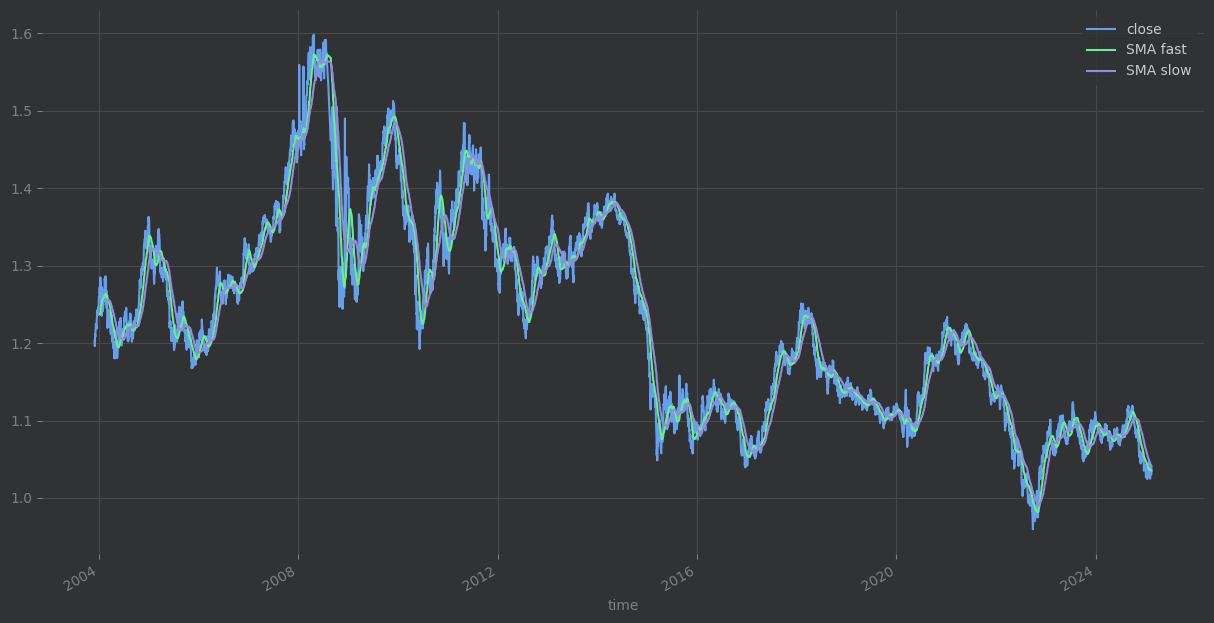

In [11]:
# Graficar resultados
df[["close", "SMA fast", "SMA slow"]].plot(figsize = (15,8))

<Axes: xlabel='time'>

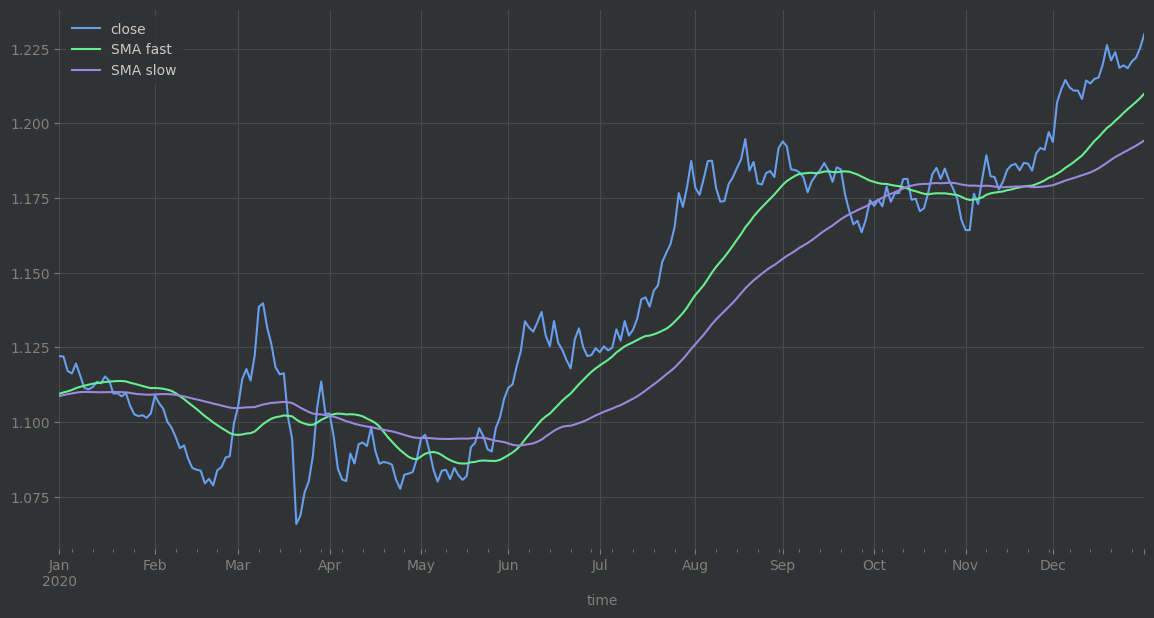

In [12]:
# Graficar resultados del 2020
df[["close", "SMA fast", "SMA slow"]].loc["2020"].plot(figsize = (14,7))

# Estrategia

In [13]:
df["position"] = np.nan

# Crear la condición
df.loc[(df["SMA fast"] > df["SMA slow"]), "position"] = 1 # Posible tendencia alsista
df.loc[(df["SMA fast"] < df["SMA slow"]), "position"] = -1 # Posible tendencia bajista

# Verificación gráfica

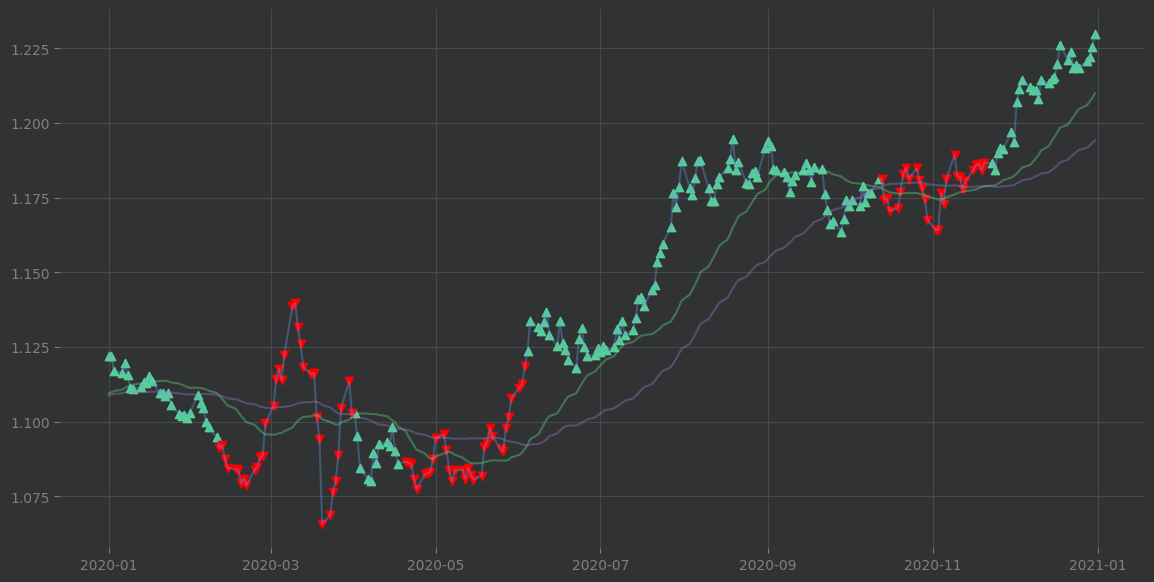

In [14]:
# Representamos toda la señal para asegurarnos de que sea correcta

year = "2020"

# Seleccionar toda la señal en una lista de índices para representar sólo estos puntos
idx_open = df.loc[df["position"] == 1].loc[year].index # Posición de compra
idx_close = df.loc[df["position"] == -1].loc[year].index # Posición de venta

# Adaptar el tamaño del gráfico
plt.figure(figsize = (14,7))

# Representar los puntos de la señal larga 'open' en verde y la 'sell' en rojo
plt.scatter(idx_open, df.loc[idx_open]["close"].loc[year], color = "#57CE95", marker = "^")
plt.scatter(idx_close, df.loc[idx_close]["close"].loc[year], color = "red", marker = "v")

# Representar la resistencia para asegurarse de que las condiciones se completan
plt.plot(df["close"].loc[year].index, df["close"].loc[year], alpha = 0.35)
plt.plot(df["close"].loc[year].index, df["SMA fast"].loc[year], alpha = 0.35)
plt.plot(df["close"].loc[year].index, df["SMA slow"].loc[year], alpha = 0.35)

# Mostrar el gráfico
plt.show()

# Calcular las ganancias

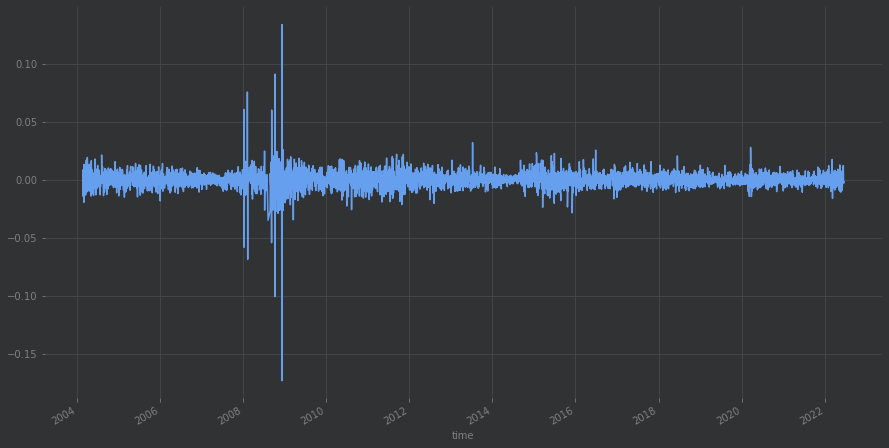

In [ ]:
# Calcular el porcentaje de variación del activo
df["pct"] = df["close"].pct_change(1)

# Calcular la rentabilidad (retorno) de la estrategia
df["return"] = df["pct"] * df["position"].shift(1)


df["return"].plot(figsize=(15,8))

In [ ]:
# Balance dirario (1%, 3%, -1%, -2%, 2%, 3%) -- > Balance acumulado (1%, 4%, 3%, 1%, 3%, 6%)

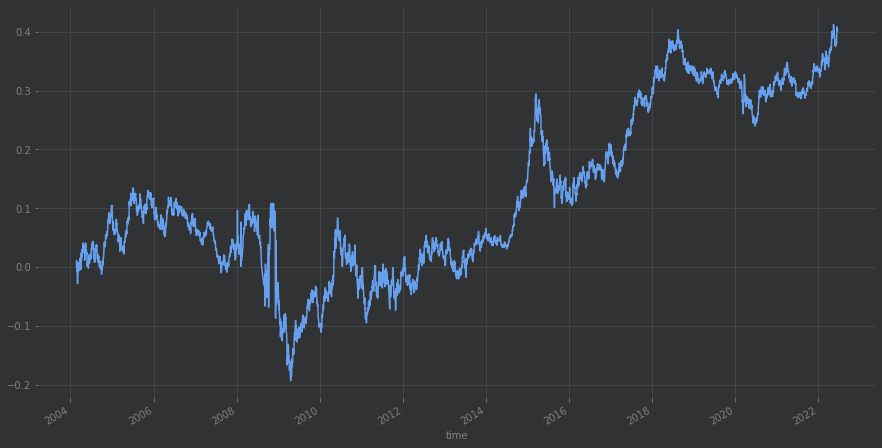

In [ ]:
df["return"].cumsum().plot(figsize=(15,8))

# Automatización

In [ ]:
def SMA_strategy(input, mt5=False, yf=False):

  if mt5:
    df = preprocessing(input)

  if yf:
    df = preprocessing_yf(input)


  # Crear resistencia mediante un máximo rodante
  df["SMA fast"] = df["close"].rolling(30).mean()

  # Crear soporte mediante un mínimo rodante
  df["SMA slow"] = df["close"].rolling(60).mean()

  df["position"] = np.nan

  # Crear la condición
  df.loc[(df["SMA fast"] > df["SMA slow"]) , "position"] = 1
  df.loc[(df["SMA fast"] < df["SMA slow"]) , "position"] = -1

  df["pct"] = df["close"].pct_change(1)

  # Calcular la rentabilidad de la estrategia

  df["return"] = df["pct"] * (df["position"].shift(1))


  return df["return"]

[*********************100%***********************]  1 of 1 completed


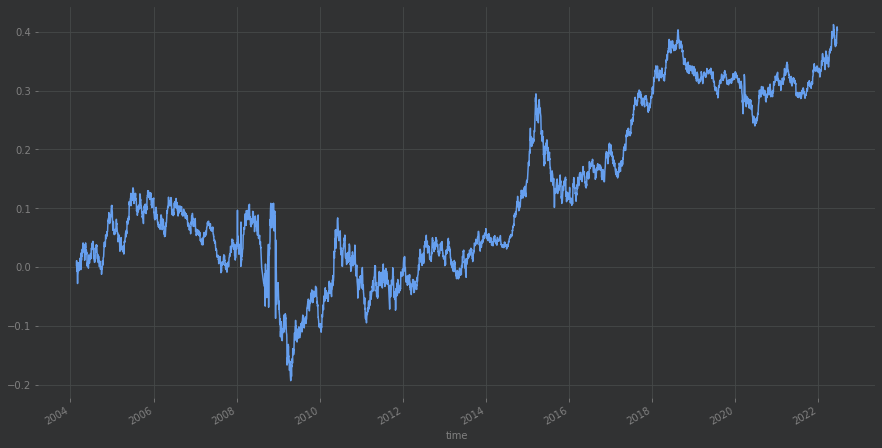

In [ ]:
SMA_strategy("EURUSD=X", yf=True).cumsum().plot(figsize=(15,8))

# Comparar la estrategia con diferentes datos

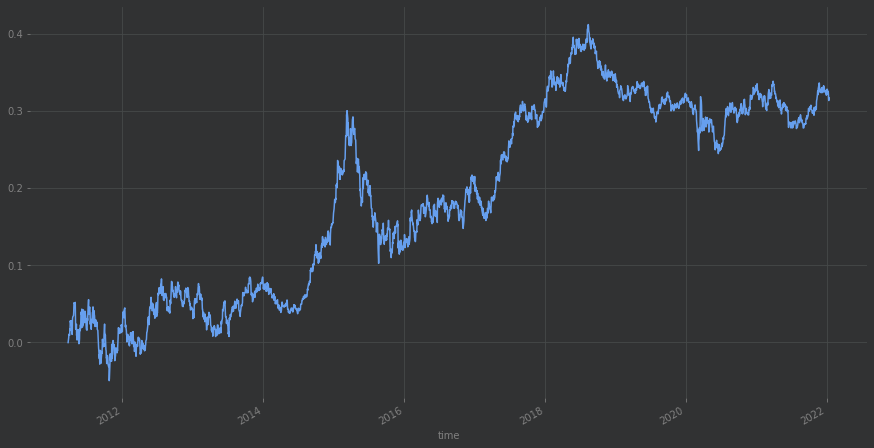

In [ ]:
SMA_strategy("EURUSD_D1.csv", mt5=True).cumsum().plot(figsize=(15,8))

[*********************100%***********************]  1 of 1 completed


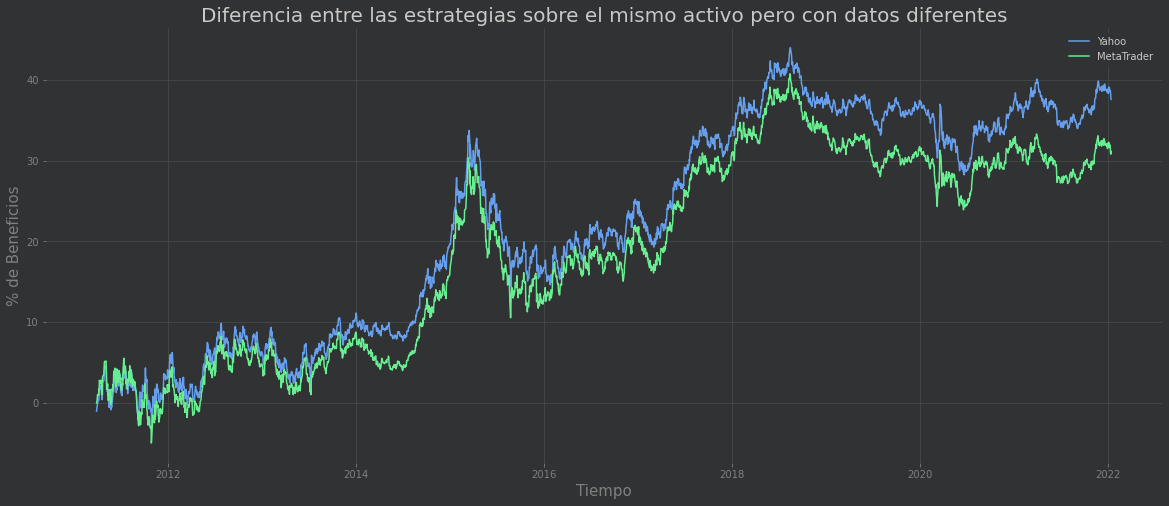

In [ ]:
# La misma estrategia pero con diferentes activos
yahoo = SMA_strategy("EURUSD=X", yf=True)
metatrader = SMA_strategy("EURUSD_D1.csv", mt5=True)

returns = pd.DataFrame([yahoo, metatrader], index=["Yahoo",
                                                   "Broker"]).transpose().dropna().cumsum(axis=0)

# Representar el gráfico

# Adaptar el tamaño
plt.figure(figsize=(20,8))

# Representar el retorno
plt.plot(returns["Yahoo"]*100, label="Yahoo")
plt.plot(returns["Broker"]*100, label="MetaTrader")

# Título y nombre de los ejes
plt.xlabel("Tiempo", size=15)
plt.ylabel("% de Beneficios", size=15)
plt.title("Diferencia entre las estrategias sobre el mismo activo pero con datos diferentes", size=20)


# Leyenda
plt.legend()
plt.show()